In [1]:
from Main_agent import compile_main_agent_graph


USER_AGENT environment variable not set, consider setting it to identify your requests.


 Loading vector store from local disk...
Compiling composer agent workflow...
Compiling reply agent workflow...
Compiling refinement agent workflow...
Compiling response agent workflow...


In [2]:
main_agent = compile_main_agent_graph()

Compiling workflow...


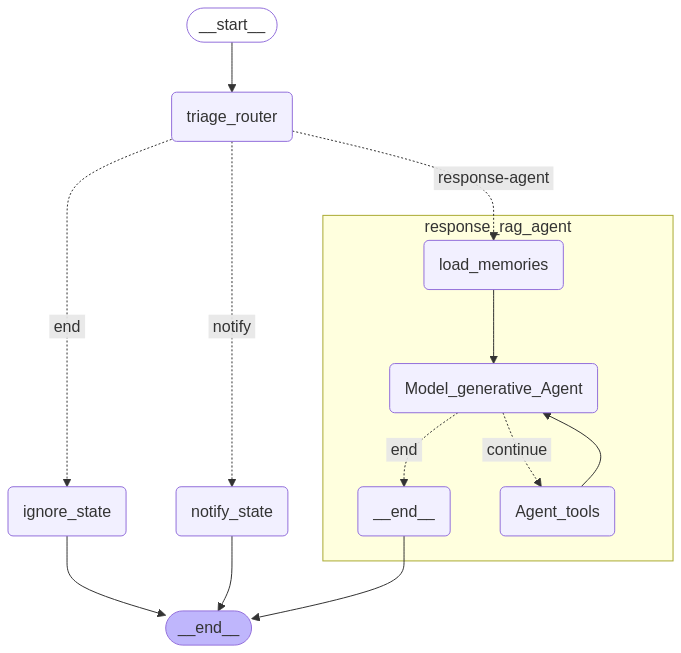

In [3]:
from IPython.display import display,Image

display(Image(main_agent.get_graph(xray=True).draw_mermaid_png()))

In [4]:

from langchain_core.runnables import RunnableConfig
# Define test input
test_input = {
    "messages_query": """
You are an expert email assistant. Based on the details below, generate a professional email:

Email Input:
{
    "from": "manab@example.com",
    "to": "professor@example.com",
    "subject": "Request for Project Collaboration"
}

Query:
Write a formal email requesting a meeting to discuss project collaboration on AI research.
""",
}

# Define configuration
config = RunnableConfig(
    configurable={"user_id": "user_12345"}
)

# Invoke the graph
final_output = main_agent.invoke(test_input, config=config)

# Print output
print("\n=== Final Graph Output ===")
print(final_output)


 Classification: RESPOND - This email requires a response
last_message:content="I will use the 'composing_email_tool' to generate a professional email based on the details provided." additional_kwargs={'id': '520fb48e-da12-4033-b805-049d54f0fd70', 'finish_reason': 'TOOL_CALL', 'tool_plan': "I will use the 'composing_email_tool' to generate a professional email based on the details provided.", 'tool_calls': [{'id': 'composing_email_tool_8k1vve1jc6nr', 'type': 'function', 'function': {'name': 'composing_email_tool', 'arguments': '{"email_details":{"from":"manab@example.com","to":"professor@example.com","subject":"Request for Project Collaboration"},"query":"Write a formal email requesting a meeting to discuss project collaboration on AI research."}'}}], 'token_count': {'input_tokens': 2008.0, 'output_tokens': 112.0}} response_metadata={'id': '520fb48e-da12-4033-b805-049d54f0fd70', 'finish_reason': 'TOOL_CALL', 'tool_plan': "I will use the 'composing_email_tool' to generate a professional

In [5]:
from pprint import pprint
pprint(final_output["generated_email"])
print(type(final_output["generated_email"]))

('{\n'
 '"From": "manab@example.com",\n'
 '"To": "professor@example.com",\n'
 '"Subject": "Collaboration Opportunity in AI Research",\n'
 '"Body": "Dear Professor [Professor\'s Last Name],\n'
 '\n'
 'I hope this email finds you well.\n'
 '\n'
 'I am writing to express my interest in collaborating on a research project '
 "in Artificial Intelligence. My research focuses on [briefly describe Manab's "
 'research area], and I believe there is significant potential for synergy '
 "with your work on [briefly describe Professor's research area].\n"
 '\n'
 'Your recent publication on [mention a specific publication] caught my '
 'attention, and I think our combined expertise could lead to significant '
 'advancements in [mention specific area of potential collaboration].\n'
 '\n'
 'I would appreciate the opportunity to discuss potential collaboration '
 'avenues further. Would you be available for a brief meeting sometime during '
 'the week of [suggest a week]? Please let me know what time w

In [11]:
generated_str = final_output["generated_email"]


In [13]:
import ast
import json

# Step 1: Safely convert the string tuple to an actual string using ast.literal_eval
clean_str = ast.literal_eval(generated_str)

# Step 2: Parse the string as JSON
email_dict = json.loads(clean_str)

# Step 3: Use the result
print(email_dict)


SyntaxError: unterminated string literal (detected at line 5) (<unknown>, line 5)